c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
21:00:09 - cmdstanpy - INFO - Chain [1] start processing
21:00:12 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x600 with 0 Axes>

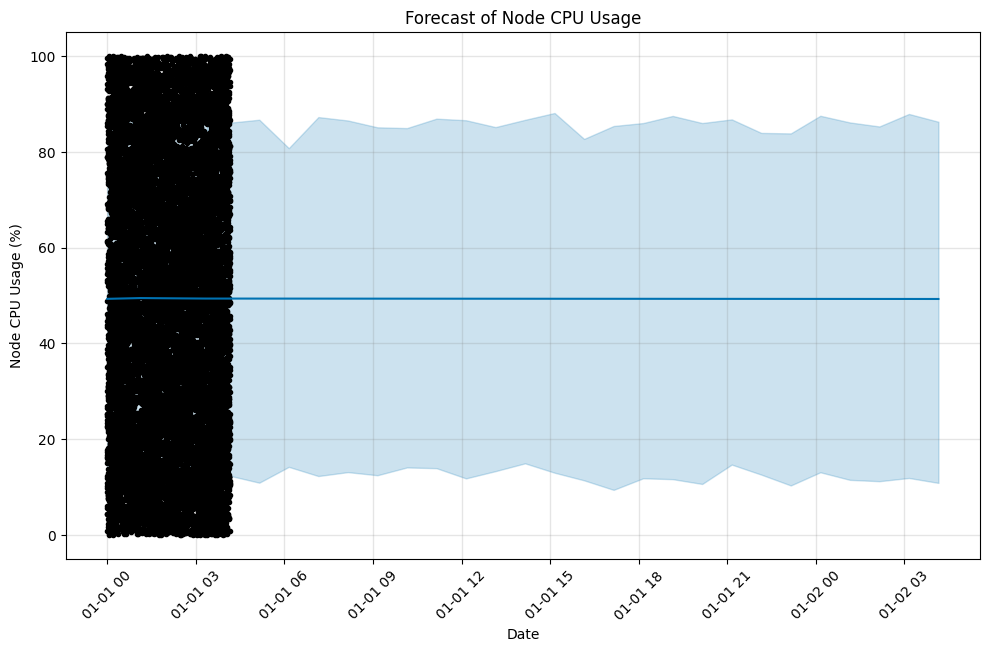

                     ds       yhat  yhat_lower  yhat_upper
250 2023-01-01 05:09:00  49.352709   10.913782   86.699303
251 2023-01-01 06:09:00  49.349195   14.216186   80.765212
252 2023-01-01 07:09:00  49.345682   12.303605   87.250588
253 2023-01-01 08:09:00  49.342169   13.120544   86.538087
254 2023-01-01 09:09:00  49.338655   12.468471   85.112418
255 2023-01-01 10:09:00  49.335142   14.096379   84.949100
256 2023-01-01 11:09:00  49.331628   13.945532   86.920009
257 2023-01-01 12:09:00  49.328115   11.811511   86.590502
258 2023-01-01 13:09:00  49.324602   13.326808   85.158901
259 2023-01-01 14:09:00  49.321088   14.955050   86.676422
260 2023-01-01 15:09:00  49.317575   12.996618   88.103225
261 2023-01-01 16:09:00  49.314062   11.404085   82.691304
262 2023-01-01 17:09:00  49.310548    9.415522   85.388482
263 2023-01-01 18:09:00  49.307035   11.833649   86.001659
264 2023-01-01 19:09:00  49.303521   11.650246   87.489530
265 2023-01-01 20:09:00  49.300008   10.649257   86.0066

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset (use latin1 encoding to handle any special characters)
data = pd.read_csv("kubernetes_performance_metrics_dataset.csv", encoding='latin1')

# Ensure 'timestamp' column is in datetime format
data["timestamp"] = pd.to_datetime(data["timestamp"])

# Handle missing values if needed (you can fill or drop depending on your needs)
data.fillna(0, inplace=True)

# You can choose any of the metrics to predict. Let's say we are predicting 'node_cpu_usage'
data["ds"] = data["timestamp"]
data["y"] = data["node_cpu_usage"]  # Replace with the metric you want to forecast, e.g., node_cpu_usage

# Prepare Data for Prophet
df_train = data[["ds", "y"]]

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_train)

# Create future dataframe for prediction (forecast for the next 24 hours)
future = model.make_future_dataframe(periods=24, freq='H')  # Forecasting the next 24 hours with hourly frequency
prediction = model.predict(future)

# Plot the forecasted results
plt.figure(figsize=(12, 6))
model.plot(prediction)
plt.title("Forecast of Node CPU Usage")
plt.xlabel("Date")
plt.ylabel("Node CPU Usage (%)")
plt.xticks(rotation=45)
plt.show()

# Output the predictions
print(prediction[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(24))

19:35:28 - cmdstanpy - INFO - Chain [1] start processing


Forecasting cpu_usage...


19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:28 - cmdstanpy - INFO - Chain [1] start processing
19:35:28 - cmdstanpy - INFO - Chain [1] done processing


Forecasting cpu_limit...


19:35:28 - cmdstanpy - INFO - Chain [1] start processing
19:35:28 - cmdstanpy - INFO - Chain [1] done processing


Forecasting cpu_request...
Forecasting cpu_throttling...
Forecasting memory_usage...


19:35:29 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing


Forecasting memory_limit...


19:35:29 - cmdstanpy - INFO - Chain [1] start processing


Forecasting memory_request...


19:35:29 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing


Forecasting memory_rss...
Forecasting network_receive_bytes...


19:35:30 - cmdstanpy - INFO - Chain [1] start processing
19:35:30 - cmdstanpy - INFO - Chain [1] done processing
19:35:30 - cmdstanpy - INFO - Chain [1] start processing
19:35:30 - cmdstanpy - INFO - Chain [1] done processing


Forecasting network_transmit_bytes...
Forecasting network_errors...
Forecasting restarts...
Forecasting oom_killed...
Forecasting pod_ready...
Forecasting pod_phase...
Forecasting disk_read_bytes...
Forecasting disk_write_bytes...
Forecasting disk_io_errors...
Forecasting pod_scheduled...
Forecasting pod_pending...
Forecasting pod_unschedulable...
Forecasting container_running...
Forecasting container_terminated...
Forecasting container_waiting...


19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:32 - cmdstanpy - INFO - Chain [1] done processing


Forecasting pod_uptime_seconds...


19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:32 - cmdstanpy - INFO - Chain [1] done processing


Forecasting cpu_utilization_ratio...
Forecasting memory_utilization_ratio...


19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing


Forecasting node_cpu_usage...
Forecasting node_cpu_capacity...
Forecasting node_cpu_allocatable...
Forecasting node_cpu_utilization_ratio...
Forecasting node_memory_usage...
Forecasting node_memory_capacity...
Forecasting node_memory_allocatable...
Forecasting node_memory_utilization_ratio...
Forecasting node_memory_pressure...
Forecasting node_disk_read_bytes...
Forecasting node_disk_write_bytes...
Forecasting node_disk_pressure...
Forecasting node_disk_capacity...
Forecasting node_disk_available...
Forecasting node_disk_utilization_ratio...
Forecasting node_network_receive_bytes...
Forecasting node_network_transmit_bytes...
Forecasting node_network_errors...
Forecasting node_ready...
Forecasting node_unschedulable...
Forecasting node_out_of_disk...


19:35:37 - cmdstanpy - INFO - Chain [1] start processing


Forecasting node_pods_running...


19:35:37 - cmdstanpy - INFO - Chain [1] done processing


Forecasting node_pods_allocatable...
Forecasting node_pods_usage_ratio...
Forecasting node_uptime_seconds...
Forecasting node_kubelet_healthy...
Forecasting node_disk_io_errors...
Forecasting node_inode_utilization_ratio...
Forecasting node_hardware_temperature...
Forecasting node_pid_pressure...


19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Forecasting deployment_replicas...


19:35:39 - cmdstanpy - INFO - Chain [1] done processing


Forecasting deployment_available_replicas...
Forecasting deployment_unavailable_replicas...
Forecasting deployment_updated_replicas...
Forecasting deployment_mismatch_replicas...
Forecasting deployment_cpu_usage...


19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing


Forecasting deployment_cpu_requests...
Forecasting deployment_cpu_limits...
Forecasting deployment_cpu_utilization_ratio...
Forecasting deployment_memory_usage...


19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing


Forecasting deployment_memory_requests...
Forecasting deployment_memory_limits...
Forecasting deployment_memory_utilization_ratio...
Forecasting deployment_pod_restarts...
Forecasting deployment_pod_crashloop_backoff...
Forecasting deployment_pod_oom_killed...
Forecasting deployment_pod_terminated...
Forecasting deployment_pod_pending...
Forecasting deployment_pod_failed...
Forecasting deployment_pod_evicted...


19:35:43 - cmdstanpy - INFO - Chain [1] start processing


Forecasting deployment_network_receive_bytes...


19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing


Forecasting deployment_network_transmit_bytes...
Forecasting deployment_network_errors...
Forecasting deployment_disk_read_bytes...
Forecasting deployment_disk_write_bytes...
Forecasting deployment_memory_pressure...
Forecasting deployment_disk_pressure...
Forecasting deployment_pid_pressure...
Forecasting deployment_unschedulable_pods...
Forecasting deployment_waiting_pods...
Forecasting deployment_backoff_limit_exceeded...
Forecasting deployment_age_seconds...


19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing


Forecasting deployment_unavailable_duration...
Forecasting deployment_progressing...


19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing


Forecasting deployment_available...
Forecasting deployment_paused...
Forecasting deployment_replica_set_mismatch...


19:35:46 - cmdstanpy - INFO - Chain [1] start processing


Forecasting deployment_rollout_in_progress...


19:35:46 - cmdstanpy - INFO - Chain [1] done processing


Forecasting deployment_image_pull_error...
Forecasting deployment_create_container_error...
Forecasting deployment_node_not_ready...
Forecasting deployment_pod_unscheduled...
Forecasts saved to 'all_metrics_forecasts_org.csv'.


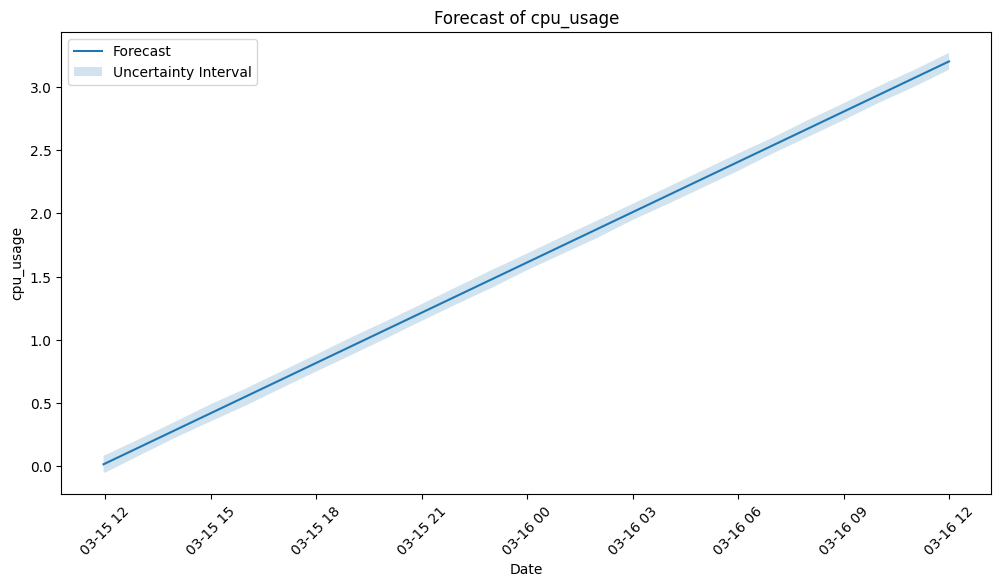

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("k8s_pod_metrics.csv")

# Ensure 'timestamp' column is in datetime format
data["timestamp"] = pd.to_datetime(data["timestamp"])

# Handle missing values (fill or drop depending on your needs)
data.fillna(0, inplace=True)

# List of all numeric metrics to forecast (exclude non-numeric columns)
numeric_metrics = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove 'timestamp' from the list if it exists (it shouldn't, but just in case)
if "timestamp" in numeric_metrics:
    numeric_metrics.remove("timestamp")

# Initialize an empty dataframe to store all forecasts
all_forecasts = pd.DataFrame()

# Loop through each metric and forecast
for metric in numeric_metrics:
    print(f"Forecasting {metric}...")

    # Prepare Data for Prophet
    df_train = data[["timestamp", metric]].rename(columns={"timestamp": "ds", metric: "y"})

    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(df_train)

    # Create future dataframe for prediction (forecast for the next 24 hours)
    future = model.make_future_dataframe(periods=24, freq='H')  # Forecasting the next 24 hours with hourly frequency
    prediction = model.predict(future)

    # Add metric name to the prediction dataframe
    prediction["metric"] = metric

    # Append the forecast to the all_forecasts dataframe
    all_forecasts = pd.concat([all_forecasts, prediction[["ds", "yhat", "yhat_lower", "yhat_upper", "metric"]]])

# Save all forecasts to a CSV file
all_forecasts.to_csv("all_metrics_forecasts_org.csv", index=False)
print("Forecasts saved to 'all_metrics_forecasts_org.csv'.")

# Plot forecasts for a sample metric (e.g., 'cpu_usage')
sample_metric = "cpu_usage"
sample_forecast = all_forecasts[all_forecasts["metric"] == sample_metric]

plt.figure(figsize=(12, 6))
plt.plot(sample_forecast["ds"], sample_forecast["yhat"], label="Forecast")
plt.fill_between(sample_forecast["ds"], sample_forecast["yhat_lower"], sample_forecast["yhat_upper"], alpha=0.2, label="Uncertainty Interval")
plt.title(f"Forecast of {sample_metric}")
plt.xlabel("Date")
plt.ylabel(sample_metric)
plt.xticks(rotation=45)
plt.legend()
plt.show()